In [1]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing Necessay Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
from statsmodels.tsa.arima.model import ARIMA#AutoRegressive Integrated Moving Average
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf#Plot Partial AutoCorrelation Function.




dataset link https://statso.io/forecasting-subscriptions-case-study/

In [4]:
# reading the data
data = pd.read_csv('/content/drive/MyDrive/Datasets/Netflix-Subscriptions.csv')
print(data.head())

  Time Period  Subscribers
0  01/04/2013     34240000
1  01/07/2013     35640000
2  01/10/2013     38010000
3  01/01/2014     41430000
4  01/04/2014     46130000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Time Period  42 non-null     object
 1   Subscribers  42 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 800.0+ bytes


In [6]:
data['Time Period'] = pd.to_datetime(data['Time Period'],
                                     format='%d/%m/%Y')
print(data.head())

  Time Period  Subscribers
0  2013-04-01     34240000
1  2013-07-01     35640000
2  2013-10-01     38010000
3  2014-01-01     41430000
4  2014-04-01     46130000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time Period  42 non-null     datetime64[ns]
 1   Subscribers  42 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 800.0 bytes


In [8]:
data.sort_values(by='Time Period', ascending=True)

,Time Period,Subscribers
0,2013-04-01,34240000
1,2013-07-01,35640000
2,2013-10-01,38010000
3,2014-01-01,41430000
4,2014-04-01,46130000
5,2014-07-01,47990000
6,2014-10-01,50650000
7,2015-01-01,54480000
8,2015-04-01,59620000
9,2015-07-01,62080000


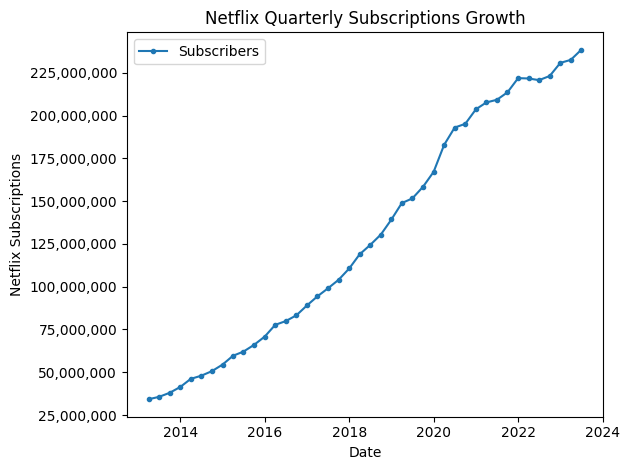

In [9]:
import matplotlib.pyplot as plt
from matplotlib import ticker

# Create a figure and axis
fig, ax = plt.subplots()

ax.plot(data['Time Period'], data['Subscribers'], marker='.', linestyle='-', label='Subscribers')

ax.set_title('Netflix Quarterly Subscriptions Growth')
ax.set_xlabel('Date')
ax.set_ylabel('Netflix Subscriptions')

ax.legend()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.xticks()  # Rotate x-axis labels for better readability ,plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
# Calculate the quarterly growth rate
data['Quarterly Growth Rate'] = data['Subscribers'].pct_change() * 100

# Create a new column for bar color (green for positive growth, red for negative growth)
data['Bar Color'] = data['Quarterly Growth Rate'].apply(lambda x: 'green' if x > 0 else 'red')

# Plot the quarterly growth rate using bar graphs
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data['Time Period'],
    y=data['Quarterly Growth Rate'],
    marker_color=data['Bar Color']
))
fig.update_layout(title='Netflix Quarterly Subscriptions Growth Rate',
                  xaxis_title='Time Period',
                  yaxis_title='Quarterly Growth Rate (%)')
fig.show()

In [11]:
# Calculate the yearly growth rate
data['Year'] = data['Time Period'].dt.year
yearly_growth = data.groupby('Year')['Subscribers'].pct_change().fillna(0) * 100

# Create a new column for bar color (green for positive growth, red for negative growth)
data['Bar Color'] = yearly_growth.apply(lambda x: 'green' if x > 0 else 'red')

# Plot the yearly subscriber growth rate using bar graphs
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data['Year'],
    y=yearly_growth,
    marker_color=data['Bar Color'],
    name='Yearly Growth Rate'
))
fig.update_layout(title='Netflix Yearly Subscriber Growth Rate',
                  xaxis_title='Year',
                  yaxis_title='Yearly Growth Rate (%)')
fig.show()

In [12]:
time_series = data.set_index('Time Period')['Subscribers']

In [13]:
time_series

Time Period
2013-04-01     34240000
2013-07-01     35640000
2013-10-01     38010000
2014-01-01     41430000
2014-04-01     46130000
2014-07-01     47990000
2014-10-01     50650000
2015-01-01     54480000
2015-04-01     59620000
2015-07-01     62080000
2015-10-01     66020000
2016-01-01     70840000
2016-04-01     77710000
2016-07-01     79900000
2016-10-01     83280000
2017-01-01     89090000
2017-04-01     94360000
2017-07-01     99040000
2017-10-01    104020000
2018-01-01    110640000
2018-04-01    118900000
2018-07-01    124350000
2018-10-01    130420000
2019-01-01    139260000
2019-04-01    148860000
2019-07-01    151560000
2019-10-01    158330000
2020-01-01    167090000
2020-04-01    182860000
2020-07-01    192950000
2020-10-01    195150000
2021-01-01    203660000
2021-04-01    207640000
2021-07-01    209180000
2021-10-01    213560000
2022-01-01    221840000
2022-04-01    221640000
2022-07-01    220670000
2022-10-01    223090000
2023-01-01    230750000
2023-04-01    232500000
2023

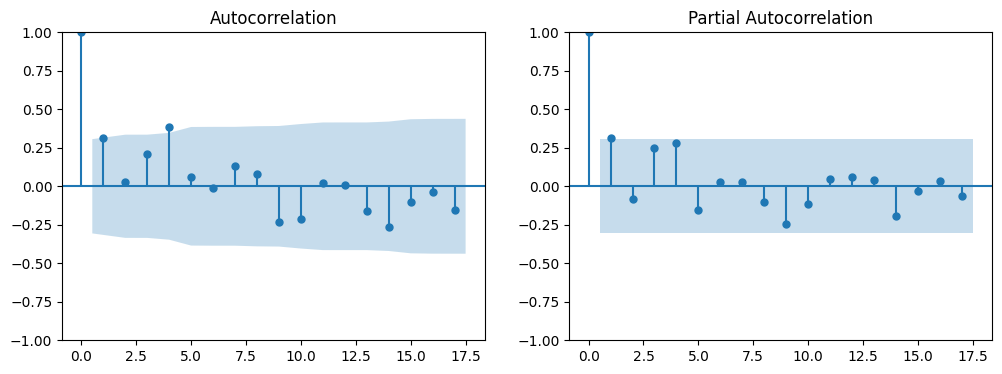

In [14]:
differenced_series = time_series.diff().dropna()

# Plot ACF and PACF of differenced time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

In [15]:
p, d, q = 3, 1, 2 #AR ,I ,moving average
model = ARIMA(time_series, order=(p, d, q))#AutoRegressive Integrated Moving Average
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.



                               SARIMAX Results                                
Dep. Variable:            Subscribers   No. Observations:                   42
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -672.630
Date:                Sat, 30 Dec 2023   AIC                           1357.260
Time:                        06:36:04   BIC                           1367.541
Sample:                    04-01-2013   HQIC                          1361.004
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1162      0.680      0.171      0.864      -1.217       1.450
ar.L2          0.9225      0.568      1.625      0.104      -0.190       2.035
ar.L3         -0.0389      0.151     -0.257      0.7

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [16]:
future_steps = 10
predictions = results.predict(len(time_series), len(time_series) + future_steps - 1)
predictions = predictions.astype(int)
predictions

2023-10-01    243235720
2024-01-01    248262202
2024-04-01    253087745
2024-07-01    258097283
2024-10-01    262935804
2025-01-01    267932001
2025-04-01    272781603
2025-07-01    277766277
2025-10-01    282625281
2026-01-01    287599987
Freq: QS-OCT, Name: predicted_mean, dtype: int64

In [17]:
# Create a DataFrame with the original data and predictions
forecast = pd.DataFrame({'Original': time_series, 'Predictions': predictions})

# Plot the original data and predictions
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.index, y=forecast['Predictions'],
                         mode='lines', name='Predictions'))

fig.add_trace(go.Scatter(x=forecast.index, y=forecast['Original'],
                         mode='lines', name='Original Data'))

fig.update_layout(title='Netflix Quarterly Subscription Predictions',
                  xaxis_title='Time Period',
                  yaxis_title='Subscribers',
                  legend=dict(x=0.1, y=0.9),
                  showlegend=True)

fig.show()

In [18]:
import pickle

# Save the model to a pickle file
with open("netflix_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)
